# Installing the Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [2]:
df_train=pd.read_csv(r"C:\Users\lenovo\Desktop\New folder (3)\Project Session\My PROJECTS DATASETS\Train.csv")
df_test=pd.read_csv(r"C:\Users\lenovo\Desktop\New folder (3)\Project Session\My PROJECTS DATASETS\Test.csv")



df=df_train
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# EDA

In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [6]:
df["Item_Weight"].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [7]:
df["Outlet_Size"].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [8]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

# Basic Visualizations

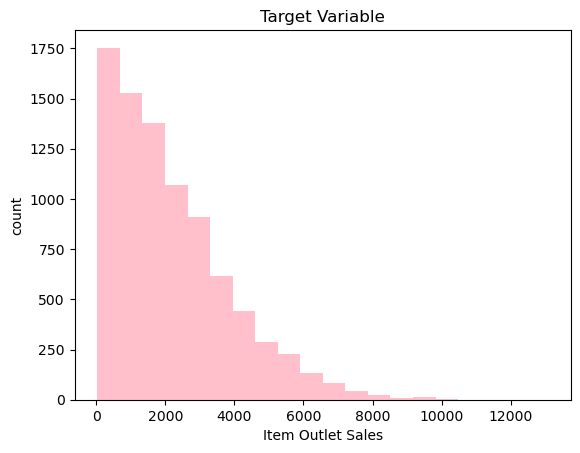

In [9]:
plt.hist(df["Item_Outlet_Sales"],bins=20,color="pink")
plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

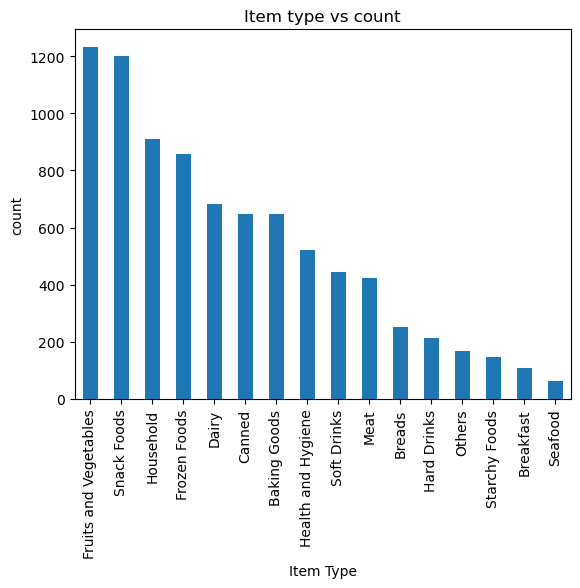

In [10]:
df["Item_Type"].value_counts().plot.bar()
plt.title('Item type vs count')
plt.xlabel('Item Type')
plt.ylabel('count')
plt.show()

In [11]:
df["Item_Fat_Content"].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [12]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace({"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"})
df["Item_Fat_Content"].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

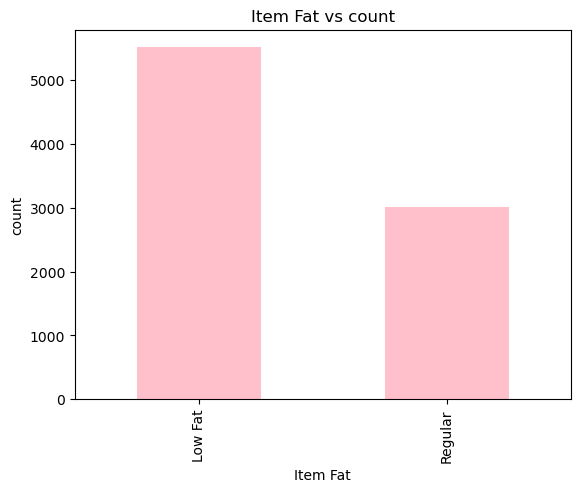

In [13]:
df["Item_Fat_Content"].value_counts().plot.bar(color="pink")
plt.title('Item Fat vs count')
plt.xlabel('Item Fat')
plt.ylabel('count')
plt.show()

In [14]:
df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

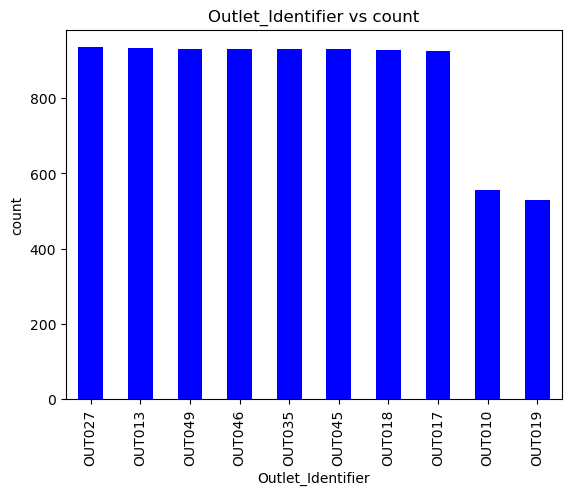

In [15]:
df["Outlet_Identifier"].value_counts().plot.bar(color="blue")
plt.title('Outlet_Identifier vs count')
plt.xlabel('Outlet_Identifier')
plt.ylabel('count')
plt.show()

In [16]:
df["Outlet_Type"].value_counts()


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

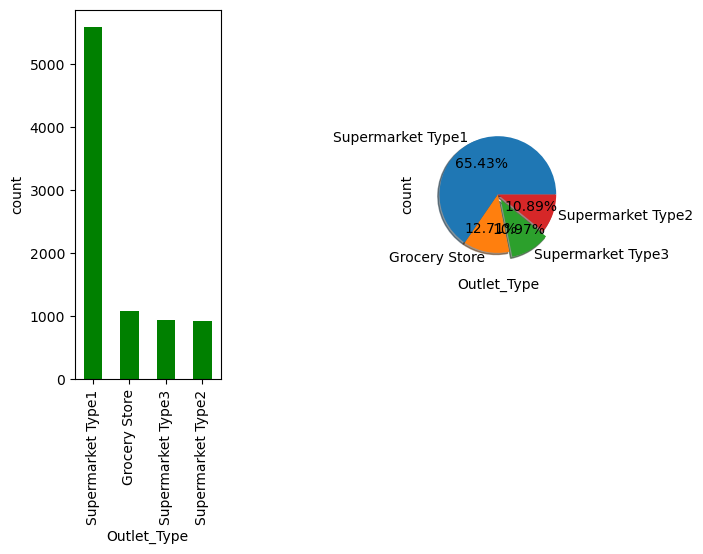

In [17]:
plt.subplot(1,3,1)
df["Outlet_Type"].value_counts().plot.bar(color="green")
plt.xlabel('Outlet_Type')
plt.ylabel('count')

plt.subplot(1,3,3)
df["Outlet_Type"].value_counts().plot.pie(explode=[0.0,0.0,0.1,0.0],shadow=True,autopct="%1.2f%%")


plt.xlabel('Outlet_Type')
plt.ylabel('count')
plt.show()

In [18]:
df["Outlet_Location_Type"].value_counts()


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

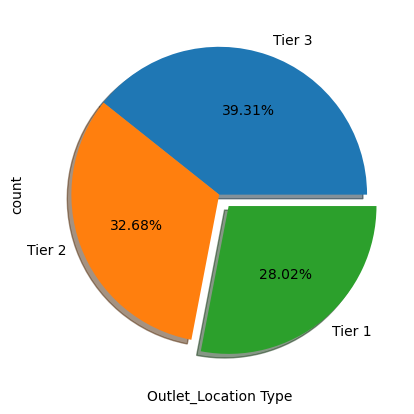

In [19]:
df["Outlet_Location_Type"].value_counts().plot.pie(explode=[0.0,0.0,0.1],shadow=True,autopct="%1.2f%%")
                                                  
plt.xlabel('Outlet_Location Type')
plt.ylabel('count')
plt.show()

In [20]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

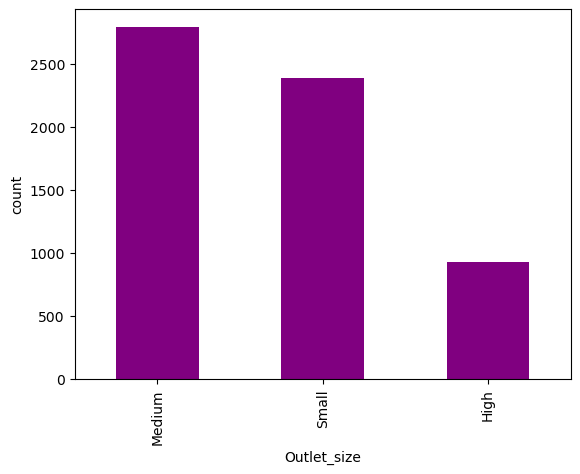

In [21]:
df["Outlet_Size"].value_counts().plot.bar(color="purple")
plt.xlabel('Outlet_size')
plt.ylabel('count')
plt.show()

In [22]:
df['Outlet_Identifier'].value_counts()    

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

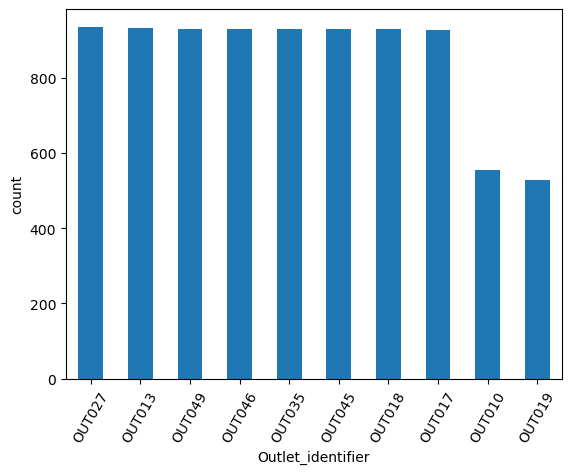

In [23]:
df['Outlet_Identifier'].value_counts().plot.bar()
plt.xticks(rotation =60)
plt.xlabel('Outlet_identifier')
plt.ylabel('count')
plt.show()
plt.show()

In [24]:
df.nunique()


Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [25]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [26]:
df["Item_Weight"]=df["Item_Weight"].fillna(df["Item_Weight"].mean())
df["Item_Weight"].isnull().any()

False

In [27]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [28]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [29]:
df['Item_Identifier'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df["Item_Identifier"].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [30]:
df['Item_Identifier'] = df['Item_Identifier'].map({"FD":'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})
df["Item_Identifier"].value_counts()

Food              6125
Non_Consumable    1599
Drinks             799
Name: Item_Identifier, dtype: int64

<AxesSubplot:ylabel='Item_Identifier'>

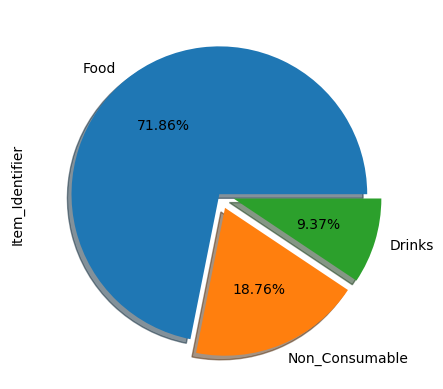

In [31]:
df["Item_Identifier"].value_counts().plot.pie(explode=[0.0,0.1,0.1],shadow=True,autopct="%1.2f%%")

In [32]:
df["Outlet Years"]=2022-df["Outlet_Establishment_Year"]
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet Years
0,Food,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,Drinks,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,Food,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,Food,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24
4,Non_Consumable,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35


In [33]:
#df.drop(["Outlet_Establishment_Year"],axis=1,inplace=True)
df.shape

(8523, 13)

In [34]:
df=pd.get_dummies(df,drop_first=True)
df.shape

(8523, 40)

In [35]:
df.head(
)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet Years,Item_Identifier_Food,Item_Identifier_Non_Consumable,Item_Fat_Content_Regular,Item_Type_Breads,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,23,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,13,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,23,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,24,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,35,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [38]:
x=df.drop(["Item_Outlet_Sales"],axis=1)
y=df["Item_Outlet_Sales"]

In [39]:
x.shape

(8523, 39)

In [40]:
y.shape

(8523,)

In [41]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Item_Outlet_Sales
Non-Null Count  Dtype  
--------------  -----  
8523 non-null   float64
dtypes: float64(1)
memory usage: 66.7 KB


In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5966, 39)
(5966,)
(2557, 39)
(2557,)


# Model Building

In [48]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

model = LinearRegression()
model.fit(x_train, y_train)

# predicting the  test set results
y_pred = model.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print('RMSE :', np.sqrt(mse))
print("Variance score(r2) :", r2_score(y_test, y_pred))
print("Training accuracy :",model.score(x_train, y_train))
print("Testing accuracy :",model.score(x_test, y_test))

[2452. 2539. 2174. ... 1723. 2643. 2814.]
MSE : 1331642.2505277796
RMSE : 1153.9680457134762
Variance score(r2) : 0.562690877049866
Training accuracy : 0.5634006955523714
Testing accuracy : 0.562690877049866


In [49]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# predicting the  test set results
y_pred = model.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print('RMSE :', np.sqrt(mse))
print("Variance score(r2) :", r2_score(y_test, y_pred))
print("Training accuracy :",model.score(x_train, y_train))
print("Testing accuracy :",model.score(x_test, y_test))

[2218.4456 1171.808  3505.437  ... 2828.3184 5522.811  3861.64  ]
MSE : 2303890.2559431084
RMSE : 1517.8571263274775
Variance score(r2) : 0.24340623256694827
Training accuracy : 1.0
Testing accuracy : 0.24340623256694827


In [59]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor( )
model.fit(x_train, y_train)

# predicting the  test set results
y_pred = model.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print("Variance score(r2) :", r2_score(y_test, y_pred))
print("Training accuracy :",model.score(x_train, y_train))
print("Testing accuracy :",model.score(x_test, y_test))

[2485.278266 1480.526144 2476.096884 ... 1537.13246  2521.524418
 3933.359976]
RMSE : 1153.8930345725648
Variance score(r2) : 0.5627477278270088
Training accuracy : 0.9377474434320888
Testing accuracy : 0.5627477278270088


In [57]:
from sklearn.ensemble import AdaBoostRegressor

model= AdaBoostRegressor(n_estimators = 100)
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
print(y_pred)


# RMSE
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))
print("Variance score(r2) :", r2_score(y_test, y_pred))
print("Training accuracy :",model.score(x_train, y_train))
print("Testing accuracy :",model.score(x_test, y_test))


[3090.62186213 2593.44868947 2870.99032443 ... 2069.35218288 3038.81857422
 3090.62186213]
RMSE : 1320.6864408242918
Variance score(r2) : 0.42720342882598683
Training accuracy : 0.4329607201176142
Testing accuracy : 0.42720342882598683


In [56]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
print(y_pred)

# Calculating the root mean squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))
print("Variance score(r2) :", r2_score(y_test, y_pred))
print("Training accuracy :",model.score(x_train, y_train))
print("Testing accuracy :",model.score(x_test, y_test))

[2618.51889453 1805.19382843 2132.34613801 ... 1675.45080796 2627.19162695
 2859.44880032]
RMSE : 1114.4815088155574
Variance score(r2) : 0.5921065740708193
Training accuracy : 0.6364604366418308
Testing accuracy : 0.5921065740708193
